In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lendo Dados - Trabalhando com Tabelas Reais

Iremos trabalhar com o dataset `datasus_populacao_faixa_etarea.csv`. Ele tem os dados do censo populacional em 2012, divididos por faixa etária.

Abaixo, está o código de como ler um artigo do tipo `.csv`, algo recorrente quando trabalhamos com dados.

In [127]:
import pandas as pd

# a função read_csv() já nos retorna um objeto do tipo DataFrame
df = pd.read_csv('data/datasus_populacao_faixa_etarea.csv')

df.head()

,População Residente - Brasil
0,População residente por Município e Faixa Etária
1,Período:2012
2,"Município;""Menor 1 ano"";""1 a 4 anos"";""5 a 9 an..."
3,110001 ALTA FLORESTA D'OESTE;371;1511;2079;236...
4,110002 ARIQUEMES;1447;6015;8504;9502;9281;1790...


Há algo estranho no DataFrame acima. Ele possui apenas uma coluna, e não divide os dados em faixas etárias, como é para ser feito.

Vá dentro da pasta `data` e abra o arquivo original em outra aba. Há algo de estranho, não é mesmo?

O nosso dataset começa com uma descrição do que ele é, com os nomes das colunas apenas aparecendo na 3a linha.

Para começar do ponto correto, iremos pular as linhas iniciais utilizando o método `skiprows` da função `pd.read_csv()`.

In [128]:
import pandas as pd

# a função read_csv() já nos retorna um objeto do tipo DataFrame
df = pd.read_csv('data/datasus_populacao_faixa_etarea.csv', skiprows=3)

df.head()

,"Município;""Menor 1 ano"";""1 a 4 anos"";""5 a 9 anos"";""10 a 14 anos"";""15 a 19 anos"";""20 a 29 anos"";""30 a 39 anos"";""40 a 49 anos"";""50 a 59 anos"";""60 a 69 anos"";""70 a 79 anos"";""80 anos e mais"";""Total"""
0,110001 ALTA FLORESTA D'OESTE;371;1511;2079;236...
1,110002 ARIQUEMES;1447;6015;8504;9502;9281;1790...
2,110003 CABIXI;109;382;493;588;577;942;893;856;...
3,110004 CACOAL;1222;4642;6336;7545;7935;14918;1...
4,110005 CEREJEIRAS;254;968;1342;1619;1701;2939;...


Mesmo assim, ainda o problema insiste.

Nessa etapa, iremos esclarecer o que separa um valor do outro no nosso dataset. Para isso, é necessário dizer qual o `separator` ou `sep` ao ler o arquivo. Analisando os dados, fica claro que esse separador é o caracter `;` (o básico do Pandas é a vírgula normal).

In [129]:
import pandas as pd

# a função read_csv() já nos retorna um objeto do tipo DataFrame
df = pd.read_csv('data/datasus_populacao_faixa_etarea.csv', skiprows=3, sep=';')

df.head()

,Município,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total
0,110001 ALTA FLORESTA D'OESTE,371,1511,2079,2369,2554,4235,3613,3238,2039,1211,680,169,24069
1,110002 ARIQUEMES,1447,6015,8504,9502,9281,17901,14999,11762,7080,3772,1842,642,92747
2,110003 CABIXI,109,382,493,588,577,942,893,856,664,365,208,55,6132
3,110004 CACOAL,1222,4642,6336,7545,7935,14918,12806,10580,6808,3665,2055,818,79330
4,110005 CEREJEIRAS,254,968,1342,1619,1701,2939,2543,2372,1450,976,514,174,16852


Agora temos um DataFrame feito a partir de um arquivo. A próxima etapa é utilizar o que você aprendeu no primeiro Notebook para analisar esses dados.

## Trabalhando com o DataFrame - Análises

A primeira análise é separar a população entre faixas mais amplas.

### Exercício 1 - 

Criar colunas '19 Anos ou Menos', '20 a 59 anos' e '60 Anos ou Acima'.

In [130]:
# Colocar sua resolução aqui

import pandas as pd

# a função read_csv() já nos retorna um objeto do tipo DataFrame
df = pd.read_csv('data/datasus_populacao_faixa_etarea.csv', skiprows=3, sep=';')

# Criação da coluna de 'Menor de 19'
df['19 Anos ou Menos'] = df['Menor 1 ano'] + df['1 a 4 anos'] + df['5 a 9 anos'] + df['10 a 14 anos'] + df['15 a 19 anos']

# Criação da coluna de '20 a 50 anos'
df['20 a 59 Anos'] = df['20 a 29 anos'] + df['30 a 39 anos'] + df['40 a 49 anos'] + df['50 a 59 anos']

df['60 Anos ou Acima'] = df['60 a 69 anos'] + df['70 a 79 anos'] + df['80 anos e mais']

df.head()

,Município,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total,19 Anos ou Menos,20 a 59 Anos,60 Anos ou Acima
0,110001 ALTA FLORESTA D'OESTE,371,1511,2079,2369,2554,4235,3613,3238,2039,1211,680,169,24069,8884,13125,2060
1,110002 ARIQUEMES,1447,6015,8504,9502,9281,17901,14999,11762,7080,3772,1842,642,92747,34749,51742,6256
2,110003 CABIXI,109,382,493,588,577,942,893,856,664,365,208,55,6132,2149,3355,628
3,110004 CACOAL,1222,4642,6336,7545,7935,14918,12806,10580,6808,3665,2055,818,79330,27680,45112,6538
4,110005 CEREJEIRAS,254,968,1342,1619,1701,2939,2543,2372,1450,976,514,174,16852,5884,9304,1664


### Exercício 2 - 
Crie outras três colunas, com valores que representem a taxa de cada grupo por município.

In [131]:
# Coluna de taxa de jovens
df['Taxa - Jovens'] = df['19 Anos ou Menos']/df['Total']

# Coluna de taxa de Adultos
df['Taxa - Adultos'] = df['20 a 59 Anos']/df['Total']

# Coluna de taxa de idosos
df['Taxa - Idosos'] = df['60 Anos ou Acima']/df['Total']

df.head()

,Município,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total,19 Anos ou Menos,20 a 59 Anos,60 Anos ou Acima,Taxa - Jovens,Taxa - Adultos,Taxa - Idosos
0,110001 ALTA FLORESTA D'OESTE,371,1511,2079,2369,2554,4235,3613,3238,2039,1211,680,169,24069,8884,13125,2060,0.369105,0.545307,0.085587
1,110002 ARIQUEMES,1447,6015,8504,9502,9281,17901,14999,11762,7080,3772,1842,642,92747,34749,51742,6256,0.374664,0.557883,0.067452
2,110003 CABIXI,109,382,493,588,577,942,893,856,664,365,208,55,6132,2149,3355,628,0.350457,0.547130,0.102414
3,110004 CACOAL,1222,4642,6336,7545,7935,14918,12806,10580,6808,3665,2055,818,79330,27680,45112,6538,0.348922,0.568663,0.082415
4,110005 CEREJEIRAS,254,968,1342,1619,1701,2939,2543,2372,1450,976,514,174,16852,5884,9304,1664,0.349157,0.552101,0.098742


## Criação de Filtros

Um DataFrame pode conter o grupo que queremos observar, mas esse mesmo pode estar no meio de informações não tão relevantes para a nossa análise.

Vamos imaginar que, para nossos fins, queremos apenas analisar os municípios que possuem mais idosos do que jovens. Como realizar isso?

A resposta é muito simples, a criação de um filtro.

### Exercício 3 - 
Criar um filtro que apenas mostre municípios com mais idosos do que jovens.

In [132]:
# Filtro feito a partir de comparações booleanas
filtro = df['19 Anos ou Menos']<df['60 Anos ou Acima']

print(filtro)

df_alta_taxa_idosos = df[filtro]

df_alta_taxa_idosos.head()

0       False
1       False
2       False
3       False
4       False
        ...  
5560    False
5561    False
5562    False
5563    False
5564    False
Length: 5565, dtype: bool


,Município,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total,19 Anos ou Menos,20 a 59 Anos,60 Anos ou Acima,Taxa - Jovens,Taxa - Adultos,Taxa - Idosos
3272,350060 AGUAS DE SAO PEDRO,25,96,141,189,211,338,384,407,337,336,231,137,2832,662,1466,704,0.233757,0.517655,0.248588
3793,354720 SANTANA DA PONTE PENSA,15,54,77,93,95,215,200,259,235,191,121,48,1603,334,909,360,0.208359,0.567062,0.224579
4650,430225 BOA VISTA DO SUL,11,81,135,145,186,349,371,470,396,342,189,92,2767,558,1586,623,0.201662,0.573184,0.225154
4713,430558 COLINAS,20,79,103,122,154,333,289,350,352,291,213,108,2414,478,1324,612,0.198012,0.548467,0.253521
4717,430583 COQUEIRO BAIXO,9,34,66,101,93,139,159,219,251,232,150,65,1518,303,768,447,0.199605,0.505929,0.294466


### Exercício 4 - 
Crie um filtro que mostre apenas os municípios que tenham mais pessoas com 19 anos ou menos do que pessoas com mais de 19 anos.

In [133]:
# Filtro feito a partir de comparações booleanas
filtro = df['19 Anos ou Menos']>(df['60 Anos ou Acima'] + df['20 a 59 Anos'])

print(filtro)

df_alta_taxa_idosos = df[filtro]

df_alta_taxa_idosos.head()

0       False
1       False
2       False
3       False
4       False
        ...  
5560    False
5561    False
5562    False
5563    False
5564    False
Length: 5565, dtype: bool


,Município,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total,19 Anos ou Menos,20 a 59 Anos,60 Anos ou Acima,Taxa - Jovens,Taxa - Adultos,Taxa - Idosos
59,120030 FEIJO,894,3504,4517,4528,3574,5636,3918,2617,1528,1097,498,249,32560,17017,13699,1844,0.522635,0.420731,0.056634
60,120032 JORDAO,247,952,1148,1057,772,1145,752,411,226,94,53,41,6898,4176,2534,188,0.605393,0.367353,0.027254
62,120034 MANOEL URBANO,217,837,1102,1149,895,1409,1059,645,450,239,159,63,8224,4200,3563,461,0.510700,0.433244,0.056055
63,120035 MARECHAL THAUMATURGO,496,1943,2405,2296,1846,2594,1587,910,531,304,162,49,15123,8986,5622,515,0.594194,0.371752,0.034054
65,120039 PORTO WALTER,331,1274,1614,1550,1002,1537,1089,590,387,188,96,53,9711,5771,3603,337,0.594275,0.371023,0.034703


## Escolhendo Colunas

Nosso DataFrame está ficando cada vez melhor, mas ainda temos um problema. Ele está muito poluído, há informações nele que não são necessárias. Como fazemos para desconsiderar as colunas que não nos interessam?

Há duas maneiras:

- A função `.drop()` do pandas
- Uma lista com o nome das colunas que queremos

### Função `drop.()`

- Passamos como parâmetro as colunas que não queremos mais no nosso DataFrame.

### Lista

- Inclui o nome das colunas que queremos no nosso DataFrame.

### Exercício 5 - 

Selecione apenas as colunas `Município`, `Total`, `19 Anos ou Menos`, `20 a 59 Anos`, `60 Anos ou Acima` do DataFrame e salve na variável `df_analise`. 

In [134]:
colunas = ['Menor 1 ano',	'1 a 4 anos',	'5 a 9 anos',	'10 a 14 anos',	'15 a 19 anos',	'20 a 29 anos',	'30 a 39 anos',	'40 a 49 anos',	'50 a 59 anos',	'60 a 69 anos',	'70 a 79 anos',	'80 anos e mais','Taxa - Jovens',	'Taxa - Adultos', 'Taxa - Idosos']

df_analise_drop = df.drop(columns=colunas)

df_analise_drop.head()

,Município,Total,19 Anos ou Menos,20 a 59 Anos,60 Anos ou Acima
0,110001 ALTA FLORESTA D'OESTE,24069,8884,13125,2060
1,110002 ARIQUEMES,92747,34749,51742,6256
2,110003 CABIXI,6132,2149,3355,628
3,110004 CACOAL,79330,27680,45112,6538
4,110005 CEREJEIRAS,16852,5884,9304,1664


In [135]:
colunas = ['Município', 'Total', '19 Anos ou Menos', '20 a 59 Anos', '60 Anos ou Acima']

df_analise_lista = df[colunas]

df_analise_lista.head()

,Município,Total,19 Anos ou Menos,20 a 59 Anos,60 Anos ou Acima
0,110001 ALTA FLORESTA D'OESTE,24069,8884,13125,2060
1,110002 ARIQUEMES,92747,34749,51742,6256
2,110003 CABIXI,6132,2149,3355,628
3,110004 CACOAL,79330,27680,45112,6538
4,110005 CEREJEIRAS,16852,5884,9304,1664


In [136]:
colunas = ['Município', 'Total', '19 Anos ou Menos', '20 a 59 Anos', '60 Anos ou Acima']

df_analise = df[colunas]

df_analise.head()

,Município,Total,19 Anos ou Menos,20 a 59 Anos,60 Anos ou Acima
0,110001 ALTA FLORESTA D'OESTE,24069,8884,13125,2060
1,110002 ARIQUEMES,92747,34749,51742,6256
2,110003 CABIXI,6132,2149,3355,628
3,110004 CACOAL,79330,27680,45112,6538
4,110005 CEREJEIRAS,16852,5884,9304,1664


## Funções e DataFrames - A Utilização do Apply()

Em DataFrames, podemos realizar operações com funções normais sem necessitar de um loop (seja ele `while` ou `for`). Para isso, utilizamos algo chamado `.apply()`, que recebe como parâmetro o nome da função desejada.

Vamos voltar ao exemplo do primeiro notebook, a tabela de times.

| Time | Vitórias | Derrotas | Empates |
| ---- | -------- | -------- | ------- |
| Real Gui Nasm | 0 | 2 | 1 |
| Orfali's Old Boys | 3 | 0 | 0 |
| Inter de Miranda | 2 | 1 | 0 |
| Clube de Regatas do Tiagão | 3 | 0 | 0 |
| Esporte Clube William Vaz | 1 | 2 | 0 |

Vamos supor que todos os times com um número de vitórias menor que $2$ ganharam nessa rodada, e os times que estavam na liderança acabaram perdendo. Como fazer um update nessa tabela sem manualmente editar os dados?

Aí entra o `.apply()`. 

Vamos criar duas funções:

- `update_vitórias(x)` : recebe o número de vitórias do time e soma um a esse número se ele for menor ou igual a 2.
- `update_derrotas(x)` : recebe o número de vitórias e derrotas do time e soma um se o número de derrotas for 0.

In [137]:
import pandas as pd

# Inicialização do DataFrame. 
df_times = pd.DataFrame()
df_times['Times'] = ['Real Gui Nasm', 'Orfalis Old Boys', 'Inter de Miranda', 'Clube de Regatas do Tiagão', 'Esporte Clube William Vaz']
df_times['Vitórias'] = [0,3,2,3,1]
df_times['Derrotas'] = [2,0,1,0,2]
df_times['Empates'] = [1,0,0,0,0]

df_times.head()

,Times,Vitórias,Derrotas,Empates
0,Real Gui Nasm,0,2,1
1,Orfalis Old Boys,3,0,0
2,Inter de Miranda,2,1,0
3,Clube de Regatas do Tiagão,3,0,0
4,Esporte Clube William Vaz,1,2,0


In [138]:
# Escreva sua Resolução Aqui

update_vitorias = lambda x: x+1 if x<=2 else x

update_derrotas = lambda x: x+1 if x==0 else x

df_times['Vitórias'] = df_times['Vitórias'].apply(update_vitorias)

df_times['Derrotas'] = df_times['Derrotas'].apply(update_derrotas)

df_times.head()

,Times,Vitórias,Derrotas,Empates
0,Real Gui Nasm,1,2,1
1,Orfalis Old Boys,3,1,0
2,Inter de Miranda,3,1,0
3,Clube de Regatas do Tiagão,3,1,0
4,Esporte Clube William Vaz,2,2,0


A partir disso, podemos até mesmo utilizar essa técnica para criar filtros, basta retornar `True` quando a condição é atendida ou `False` no caso contrário.

### Exercício 6 - 

Crie um filtro para mostrar apenas os municípios do Sudeste brasileiro. 

        Dica : olhe para o número dos municípios

In [139]:
eh_sudeste = lambda x: True if x[0] == '3' else False

filtro = df['Município'].apply(eh_sudeste)

df_sudeste = df[filtro]

df_sudeste.head()

,Município,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total,19 Anos ou Menos,20 a 59 Anos,60 Anos ou Acima,Taxa - Jovens,Taxa - Adultos,Taxa - Idosos
2243,310010 ABADIA DOS DOURADOS,97,304,407,552,519,995,1040,1023,819,601,272,114,6743,1879,3877,987,0.278659,0.574967,0.146374
2244,310020 ABAETE,270,1047,1550,1915,1850,3498,3199,3411,2713,1781,1026,480,22740,6632,12821,3287,0.291645,0.563808,0.144547
2245,310030 ABRE CAMPO,168,704,1027,1190,1206,2028,1901,1801,1442,927,634,278,13306,4295,7172,1839,0.322787,0.539005,0.138208
2246,310040 ACAIACA,68,198,264,384,372,568,589,512,374,300,190,106,3925,1286,2043,596,0.327643,0.520510,0.151847
2247,310050 ACUCENA,140,504,819,1113,958,1395,1339,1192,1007,778,581,267,10093,3534,4933,1626,0.350144,0.488755,0.161102


## Análise de Dados - Criando Gráficos

Após toda essa análise, chegou a hora de criarmos gráficos que nos ajudam a analisar melhor os nossos dados, já que as tabelas são muito densas.

Para isso, iremos utilizar o pacote `Matplotlib` do python. Geralmente, fazemos `import matplotlib.pyplot as plt` para simplificar a confecção do código (pense no `plt` como uma outra maneira de chamar `marplotlib.pyplot`).

Abaixo está um exemplo que plota o número de jovens por município do sudeste.

C:\Users\jalfr\AppData\Local\Temp\ipykernel_23332\2977788060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sudeste['Município'] = df_sudeste['Município'].apply(lambda x: x[7:])


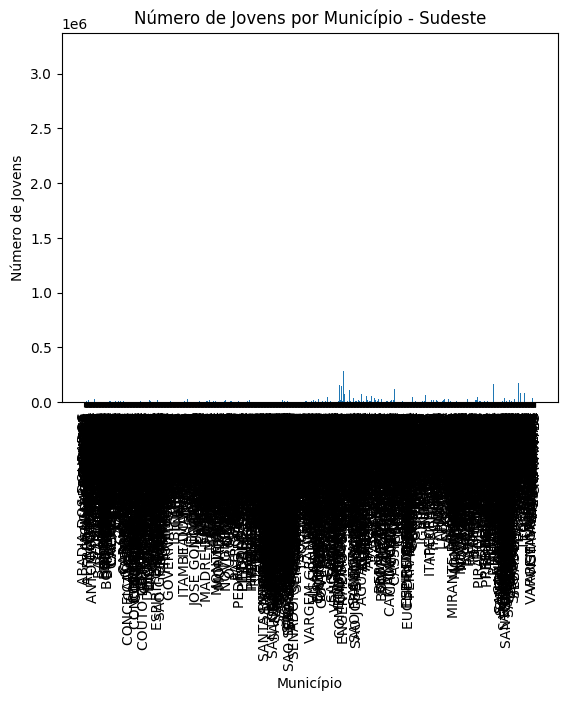

In [153]:
filtro = df['Município'].apply(lambda x: True if x[0] == '3' else False)

df_sudeste = df[filtro]

df_sudeste['Município'] = df_sudeste['Município'].apply(lambda x: x[7:])

plt.bar(df_sudeste['Município'],df_sudeste['19 Anos ou Menos'])
plt.xlabel('Município')
plt.xticks(rotation=90)
plt.ylabel('Número de Jovens')
plt.title('Número de Jovens por Município - Sudeste')
plt.show()

Apesar de tecnicamente mostrar o número de jovens por município do sudeste, a imagem acima é ilegível.

Vamos limitar um pouco mais nosso escopo.

## Ordenação - Avaliando Números em Ordens

### Exercício 7 - 

Vamos ordenar nosso DataFrame do Sudeste em termos de quem tem o maior número de jovens. Pegar apenas os 10 primeiros (os que possuem o maior número de jovens).

Para isso, iremos utilizar a função `sort_values()`.

C:\Users\jalfr\AppData\Local\Temp\ipykernel_23332\313120333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sudeste['Município'] = df_sudeste['Município'].apply(lambda x: x[7:])


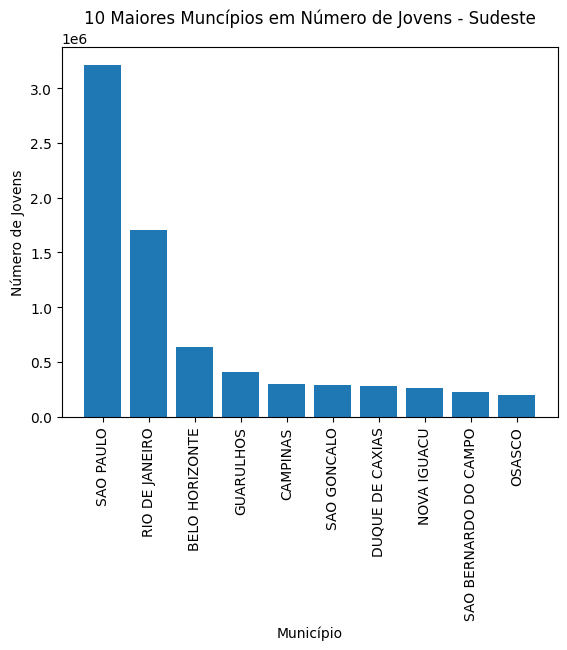

In [162]:
filtro_sudeste = df['Município'].apply(lambda x: True if x[0] == '3' else False)

df_sudeste = df[filtro_sudeste]

df_sudeste['Município'] = df_sudeste['Município'].apply(lambda x: x[7:])

df_sudeste_sorted = df_sudeste.sort_values('19 Anos ou Menos',ascending=False).head(10)

plt.bar(df_sudeste_sorted['Município'],df_sudeste_sorted['19 Anos ou Menos'])
plt.xlabel('Município')
plt.xticks(rotation=90)
plt.ylabel('Número de Jovens')
plt.title('10 Maiores Muncípios em Número de Jovens - Sudeste')
plt.show()

### Exercício 8 - 
Faça o mesmo para os municípios do Sudeste que tem a maior taixa de jovens.

C:\Users\jalfr\AppData\Local\Temp\ipykernel_23332\1340327694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sudeste['Município'] = df_sudeste['Município'].apply(lambda x: x[7:])


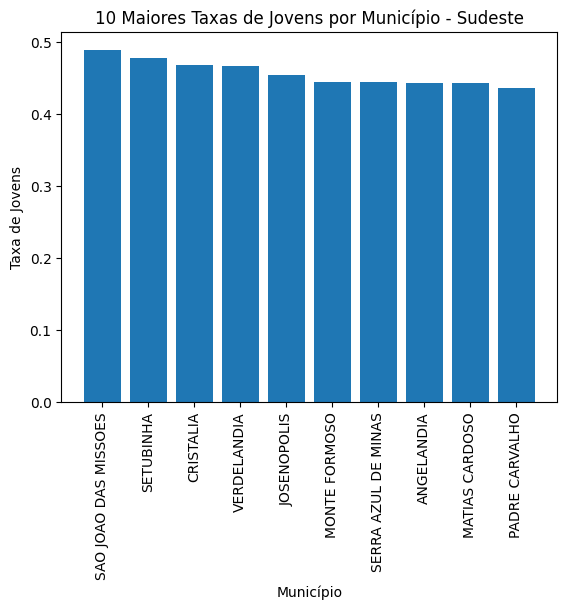

In [159]:
filtro_sudeste = df['Município'].apply(lambda x: True if x[0] == '3' else False)

df_sudeste = df[filtro_sudeste]

df_sudeste['Município'] = df_sudeste['Município'].apply(lambda x: x[7:])

df_sudeste_sorted = df_sudeste.sort_values('Taxa - Jovens',ascending=False).head(10)

plt.bar(df_sudeste_sorted['Município'],df_sudeste_sorted['Taxa - Jovens'])
plt.xlabel('Município')
plt.xticks(rotation=90)
plt.ylabel('Taxa de Jovens')
plt.title('10 Maiores Taxas de Jovens por Município - Sudeste')
plt.show()

### Exercício 9 - 

Refaça o gráfico dos 10 maiores municípios em termos de número de jovens, mas para a região do Nordeste.

C:\Users\jalfr\AppData\Local\Temp\ipykernel_23332\2095923901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nordeste['Município'] = df_nordeste['Município'].apply(lambda x: x[7:])


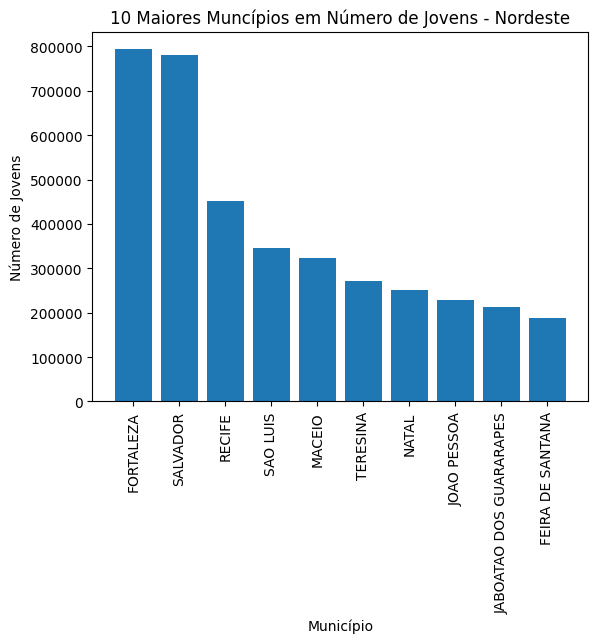

In [163]:
filtro_nordeste = df['Município'].apply(lambda x: True if x[0] == '2' else False)

df_nordeste = df[filtro_nordeste]

df_nordeste['Município'] = df_nordeste['Município'].apply(lambda x: x[7:])

df_nordeste_sorted = df_nordeste.sort_values('19 Anos ou Menos',ascending=False).head(10)

plt.bar(df_nordeste_sorted['Município'],df_nordeste_sorted['19 Anos ou Menos'])
plt.xlabel('Município')
plt.xticks(rotation=90)
plt.ylabel('Número de Jovens')
plt.title('10 Maiores Muncípios em Número de Jovens - Nordeste')
plt.show()